In [1]:
import anndata
import os

# Load the .h5ad file (replace with your filename)
input_file = os.path.join('data', 'dataset.h5ad')
adata = anndata.read_h5ad(input_file)

# Basic info
print(adata)
print("Shape:", adata.shape)

# Show first few rows of observations and variables
print("Observations (obs):")
print(adata.obs.head())

print("Variables (var):")
print(adata.var.head())

# List available layers
print("Layers:", list(adata.layers.keys()))

# List obs and var columns
print("Obs columns:", adata.obs.columns.tolist())
print("Var columns:", adata.var.columns.tolist())

AnnData object with n_obs × n_vars = 3460 × 13565
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'
    var: 'feature_id', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'feature_name'
    uns: 'dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'normalization_id', 'spatial'
    obsm: 'spatial'
    layers: 'counts', 'normalized'
Shape: (3460, 13565)
Observations (obs):
                    in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4112   
AAACAATCTACTAGCA-1          1          3         43         

In [4]:
# read  the counts layer
counts = adata.layers['counts']
print("Counts layer:")
print(counts.shape)


Counts layer:
(3460, 13565)


In [7]:
# show counts layer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert counts to a DataFrame for easier manipulation
counts_df = pd.DataFrame(counts.toarray(), index=adata.obs_names, columns=adata.var_names)
# Display the first few rows of the counts DataFrame
print("Counts DataFrame:")
counts_df.head()

Counts DataFrame:


gene_ids,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000188290,ENSG00000187608,ENSG00000188157,ENSG00000131591,ENSG00000186891,ENSG00000186827,...,ENSG00000155962,ENSG00000185973,ENSG00000168939,ENSG00000124333,ENSG00000067646,ENSG00000092377,ENSG00000114374,ENSG00000067048,ENSG00000154620,ENSG00000012817
AAACAAGTATCTCCCA-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
AAACAATCTACTAGCA-1,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0
AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
counts_df.columns

Index(['ENSG00000187634', 'ENSG00000188976', 'ENSG00000187961',
       'ENSG00000187583', 'ENSG00000188290', 'ENSG00000187608',
       'ENSG00000188157', 'ENSG00000131591', 'ENSG00000186891',
       'ENSG00000186827',
       ...
       'ENSG00000155962', 'ENSG00000185973', 'ENSG00000168939',
       'ENSG00000124333', 'ENSG00000067646', 'ENSG00000092377',
       'ENSG00000114374', 'ENSG00000067048', 'ENSG00000154620',
       'ENSG00000012817'],
      dtype='object', name='gene_ids', length=13565)

In [ ]:
# convert observations to a DataFrame
obs_df = adata.obs.copy()

Index(['AAACAAGTATCTCCCA-1', 'AAACAATCTACTAGCA-1', 'AAACACCAATAACTGC-1',
       'AAACAGAGCGACTCCT-1', 'AAACAGCTTTCAGAAG-1', 'AAACAGGGTCTATATT-1',
       'AAACATGGTGAGAGGA-1', 'AAACCACTACACAGAT-1', 'AAACCCGAACGAAATC-1',
       'AAACCGGAAATGTTAA-1',
       ...
       'TTGTGGTAGGAGGGAT-1', 'TTGTGGTATAGGTATG-1', 'TTGTGTATGCCACCAA-1',
       'TTGTGTTTCCCGAAAG-1', 'TTGTTAGCAAATTCGA-1', 'TTGTTCAGTGTGCTAC-1',
       'TTGTTTCACATCCAGG-1', 'TTGTTTCATTAGTCTA-1', 'TTGTTTCCATACAACT-1',
       'TTGTTTGTGTAAATTC-1'],
      dtype='object', length=3460)

In [11]:
# use array_row. array_col as x and y and use the column of the highest count in counts_df as color

# Get the indices of the maximum counts for each observation
max_indices = np.argmax(counts, axis=1)
# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'x': obs_df["array_row"],  # First PCA component
    'y': obs_df["array_col"],  # Second PCA component
    'max_gene': max_indices
})

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x='x', y='y', hue='max_gene', palette='viridis', legend=None)
plt.title('PCA Plot with Max Gene Color')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


ValueError: Per-column arrays must each be 1-dimensional

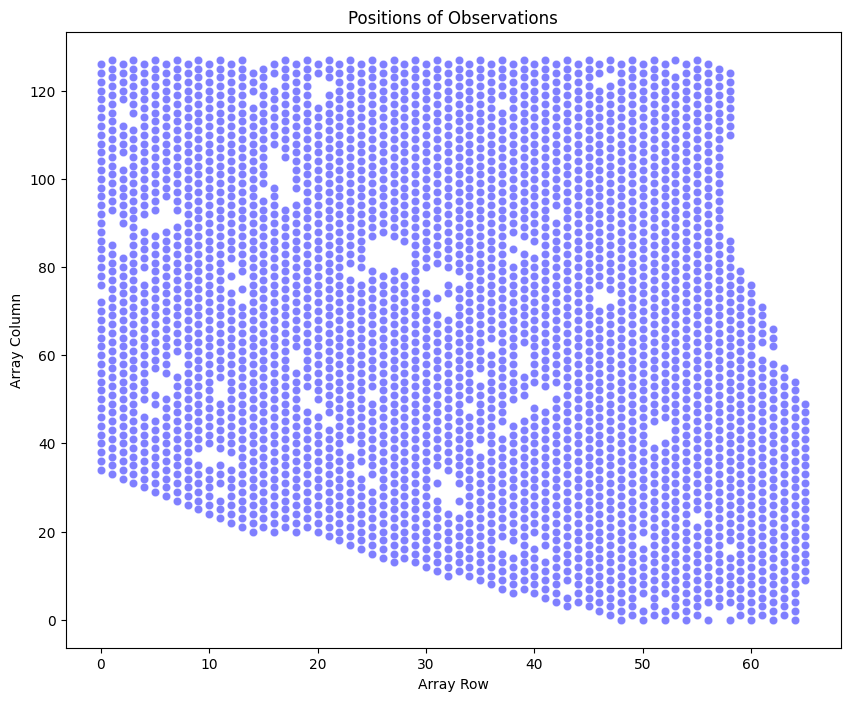

In [12]:
# plot positions of the experssions in observations using array_row and array_col in obs_df
plt.figure(figsize=(10, 8))
sns.scatterplot(data=obs_df, x='array_row', y='array_col', color='blue', alpha=0.5)
plt.title('Positions of Observations')
plt.xlabel('Array Row')
plt.ylabel('Array Column')
plt.show()


In [16]:
#Join the counts_df with obs_df
joined_df = obs_df.join(counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined DataFrame:")
joined_df.head()

Joined DataFrame:


,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,ENSG00000155962,ENSG00000185973,ENSG00000168939,ENSG00000124333,ENSG00000067646,ENSG00000092377,ENSG00000114374,ENSG00000067048,ENSG00000154620,ENSG00000012817
AAACAAGTATCTCCCA-1,1,50,102,4112,8.321908,8211.0,9.013351,14.845938,20.557788,27.950311,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
AAACAATCTACTAGCA-1,1,3,43,7063,8.862767,21905.0,9.994515,13.558548,18.237845,24.807122,...,1.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0
AAACACCAATAACTGC-1,1,59,19,2961,7.993620,4987.0,8.514791,15.299779,21.195107,29.256066,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
AAACAGAGCGACTCCT-1,1,14,94,3110,8.042699,5575.0,8.626227,15.838565,21.739910,29.524664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
AAACAGCTTTCAGAAG-1,1,43,9,5010,8.519391,10090.0,9.219399,11.585728,16.253717,22.983152,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# create data frame from the counts_df where the value is the column name of the highest value in teh row
max_counts_df = counts_df.idxmax(axis=1)
# Display the first few rows of the max_counts DataFrame
print("Max Counts DataFrame:")
type(max_counts_df)
#convert to a DataFrame
max_counts_df = pd.DataFrame(max_counts_df, columns=['max_gene'])
max_counts_df.head()

Max Counts DataFrame:


,max_gene
AAACAAGTATCTCCCA-1,ENSG00000150991
AAACAATCTACTAGCA-1,ENSG00000142515
AAACACCAATAACTGC-1,ENSG00000107317
AAACAGAGCGACTCCT-1,ENSG00000107796
AAACAGCTTTCAGAAG-1,ENSG00000150991


In [25]:
#join the max_counts_df with obs_df
joined_max_counts_df = obs_df.join(max_counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined Max Counts DataFrame:")
joined_max_counts_df.head()

Joined Max Counts DataFrame:


,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,size_factors,max_gene
AAACAAGTATCTCCCA-1,1,50,102,4112,8.321908,8211.0,9.013351,14.845938,20.557788,27.950311,41.480940,4112,8196.0,ENSG00000150991
AAACAATCTACTAGCA-1,1,3,43,7063,8.862767,21905.0,9.994515,13.558548,18.237845,24.807122,36.986989,7063,21879.0,ENSG00000142515
AAACACCAATAACTGC-1,1,59,19,2961,7.993620,4987.0,8.514791,15.299779,21.195107,29.256066,44.114698,2961,4976.0,ENSG00000107317
AAACAGAGCGACTCCT-1,1,14,94,3110,8.042699,5575.0,8.626227,15.838565,21.739910,29.524664,44.430493,3110,5567.0,ENSG00000107796
AAACAGCTTTCAGAAG-1,1,43,9,5010,8.519391,10090.0,9.219399,11.585728,16.253717,22.983152,36.283449,5010,10066.0,ENSG00000150991


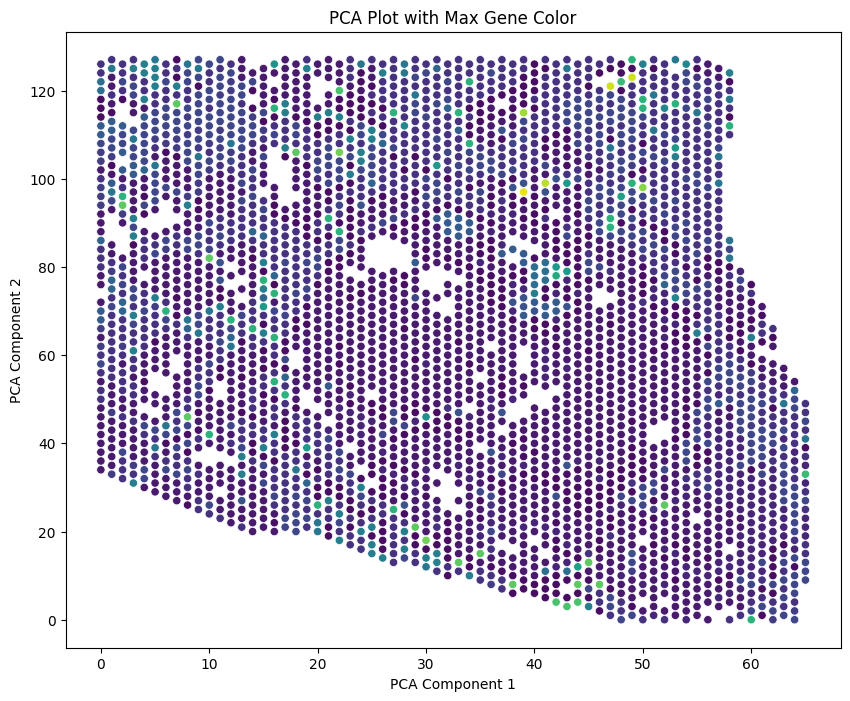

In [27]:
# plot chart with x as array_row, y as array_col and color as max_gene
plt.figure(figsize=(10, 8))
sns.scatterplot(data=joined_max_counts_df, x='array_row', y='array_col', hue='max_gene', palette='viridis', legend=None)
plt.title('PCA Plot with Max Gene Color')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

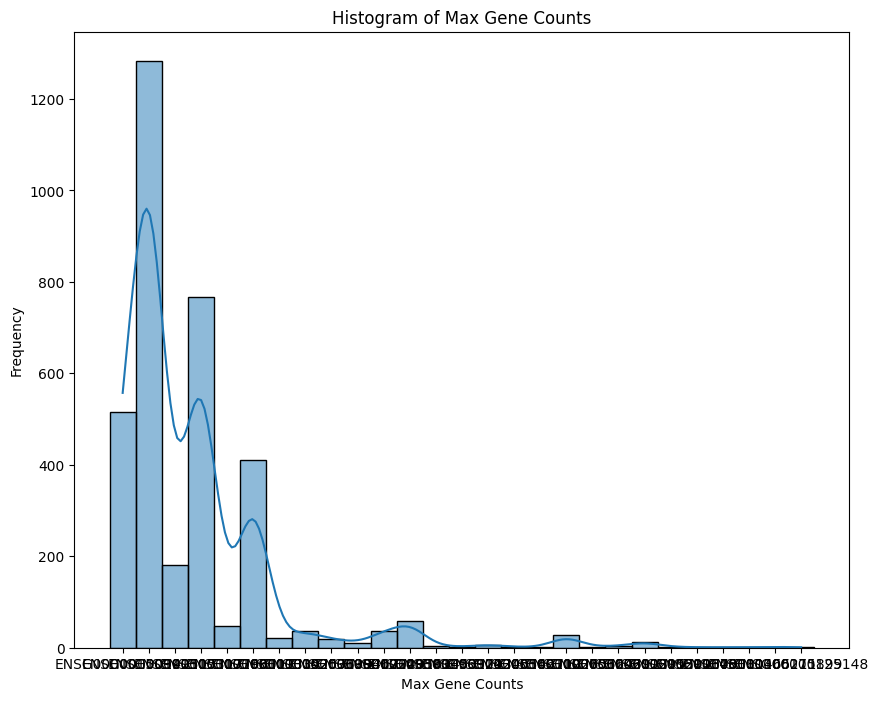

In [28]:
# histogram of the max gene counts
plt.figure(figsize=(10, 8))
sns.histplot(data=joined_max_counts_df, x='max_gene', bins=30, kde=True)
plt.title('Histogram of Max Gene Counts')
plt.xlabel('Max Gene Counts')
plt.ylabel('Frequency')
plt.show()


In [29]:
# find the top 10 genes with the highest counts
top_genes = counts_df.sum(axis=0).nlargest(10)
# Display the top 10 genes
print("Top 10 Genes with Highest Counts:")
print(top_genes)

Top 10 Genes with Highest Counts:
gene_ids
ENSG00000142515    467281.0
ENSG00000014257    298088.0
ENSG00000150991    267157.0
ENSG00000107796    193015.0
ENSG00000101335    187140.0
ENSG00000167751    183211.0
ENSG00000075624    172753.0
ENSG00000263639    148996.0
ENSG00000149591    141297.0
ENSG00000205542    136050.0
dtype: float32


In [30]:
# find the names of the top 10 genes
top_genes_names = top_genes.index.tolist()
# Display the names of the top 10 genes
print("Top 10 Genes Names:")
print(top_genes_names)

Top 10 Genes Names:
['ENSG00000142515', 'ENSG00000014257', 'ENSG00000150991', 'ENSG00000107796', 'ENSG00000101335', 'ENSG00000167751', 'ENSG00000075624', 'ENSG00000263639', 'ENSG00000149591', 'ENSG00000205542']
